In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.feature_selection import RFECV
import pandas_profiling as pp
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('Brain Tumor.csv')
data = dataset.values

df = pd.DataFrame(dataset)

x = data[:, :14]
y = data[:, 1]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3762, 15)
Dimensionalitat de les entrades X (3762, 14)
Dimensionalitat de l'atribut Y (3762,)


In [3]:
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982,0.000
1,Image2,0,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989,0.000
2,Image3,1,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978,0.000
3,Image4,1,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964,0.000
4,Image5,0,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.235,1208.850,34.769,0.064,2.082,4.647,158.438,0.221,0.049,0.487,5.212,0.951,0.000
3758,Image3759,0,20.435,1227.151,35.031,0.067,2.145,4.882,161.159,0.226,0.051,0.503,5.083,0.953,0.000
3759,Image3760,0,18.012,1151.583,33.935,0.068,2.308,5.579,167.130,0.229,0.052,0.492,5.104,0.952,0.000
3760,Image3761,0,13.330,945.733,30.753,0.088,2.733,7.758,223.813,0.262,0.068,0.480,6.440,0.941,0.000


0 = NO TUMOR  
1 = TUMOR

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [5]:
print("Per comptar el nombre de valors no existents:")
print(df.isnull().sum())

Per comptar el nombre de valors no existents:
Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


In [6]:
new_df= df.drop(['Coarseness'],axis=1)
new_df= new_df.drop(['Image'],axis=1)
new_df['Class'] = new_df['Class'].astype(float)
new_df.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,0.000,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982
1,0.000,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989
2,1.000,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978
3,1.000,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964
4,0.000,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973


In [7]:
def normalize_df(df):
    return((df-df.min())/(df.max()-df.min()))
dataset = normalize_df(new_df)


In [253]:
joblib.dump(normalize_df, 'normalize.pkl')
joblib.dump(load_dataset, 'load_data.pkl')

['load_data.pkl']

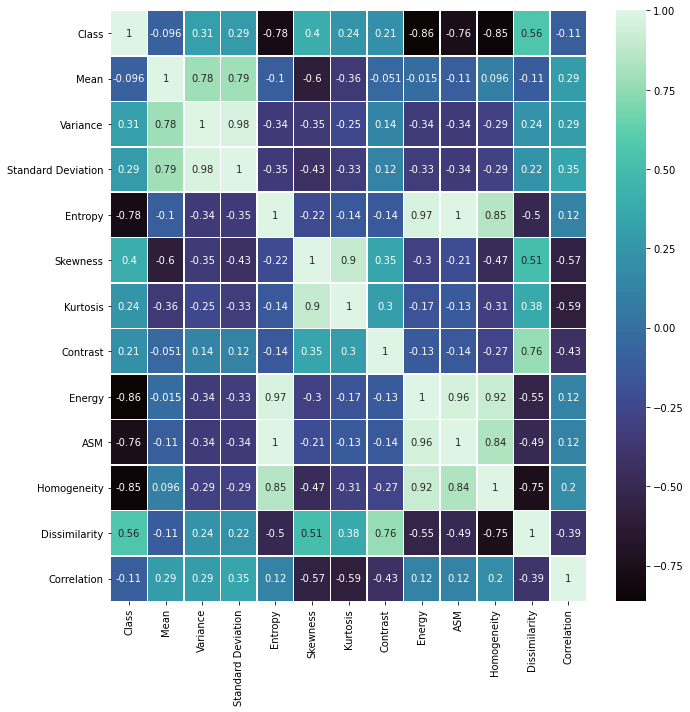

In [8]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlacio, annot=True, linewidths=.5, ax=ax, cmap="mako")

fig.tight_layout()

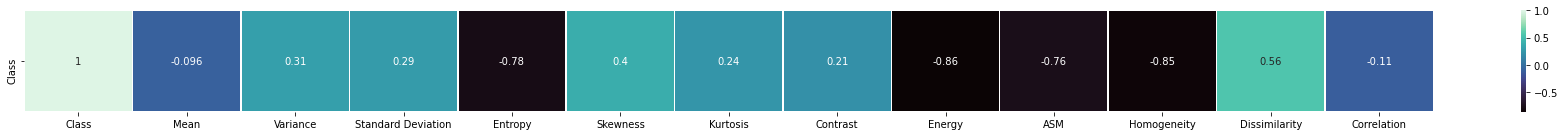

In [9]:
tumor = dataset.corr()['Class'].to_frame().T
fig, ax = plt.subplots(figsize=(25,2))         # Sample figsize in inches
sns.heatmap(tumor, annot=True, linewidths=.5, ax=ax, cmap="mako")

fig.tight_layout()


In [10]:
correlation_threshold = 0.25
attributes  = list(filter(lambda x: abs(float(dataset.corr()['Class'].to_frame().T[x])) > correlation_threshold, dataset.columns))
attributes.remove('Class')
corrTbl = PrettyTable()
corrTbl.field_names = ['Atribut']
for i in range(len(attributes)): 
    corrTbl.add_row([attributes[i]])
print(corrTbl)

+--------------------+
|      Atribut       |
+--------------------+
|      Variance      |
| Standard Deviation |
|      Entropy       |
|      Skewness      |
|       Energy       |
|        ASM         |
|    Homogeneity     |
|   Dissimilarity    |
+--------------------+


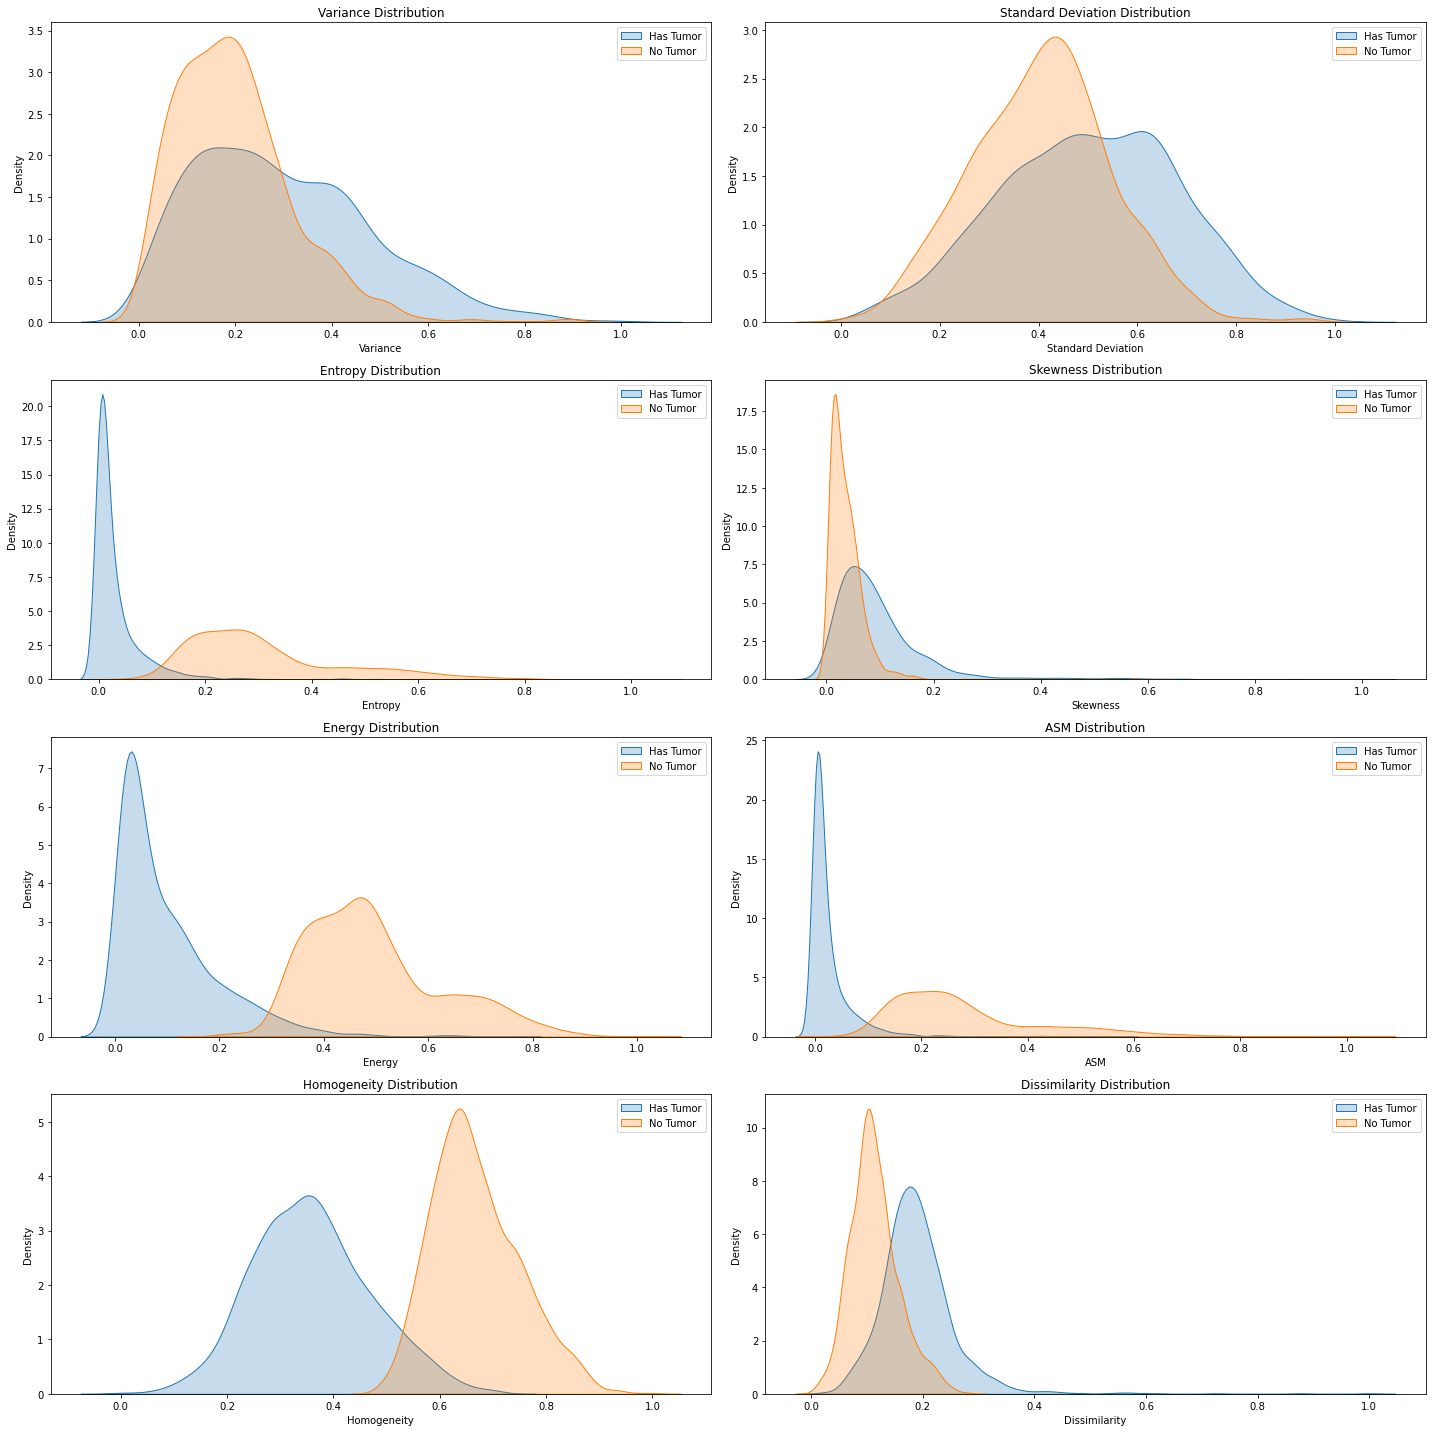

In [11]:
tumor = dataset[dataset['Class']==1]
no_tumor = dataset[dataset['Class']==0]
fig, axes = plt.subplots(4,2, figsize=(20,20))
ax = axes.ravel()

for i in range(len(attributes)): 
    ax[i].set_title(f'{attributes[i]} Distribution')
    if (i==0):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[0,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[0,0])
    elif(i==1):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[0,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[0,1])
    elif(i==2):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[1,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[1,0])
    elif(i==3):
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[1,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[1,1])
    elif i==4:
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[2,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[2,0])
    elif i==5:        
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[2,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[2,1])
    elif i==6:    
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[3,0])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[3,0])
    elif i==7:
        sns.distplot(tumor[attributes[i]], hist=False, kde_kws={'shade':True},label="Has Tumor",ax=axes[3,1])
        sns.distplot(no_tumor[attributes[i]], hist=False, kde_kws={'shade': True}, label= "No Tumor",ax=axes[3,1])
    ax[i].legend(["Has Tumor", "No Tumor"], loc="best")
fig.tight_layout()
fig.savefig('distribution.png')
attributes.append('Class')

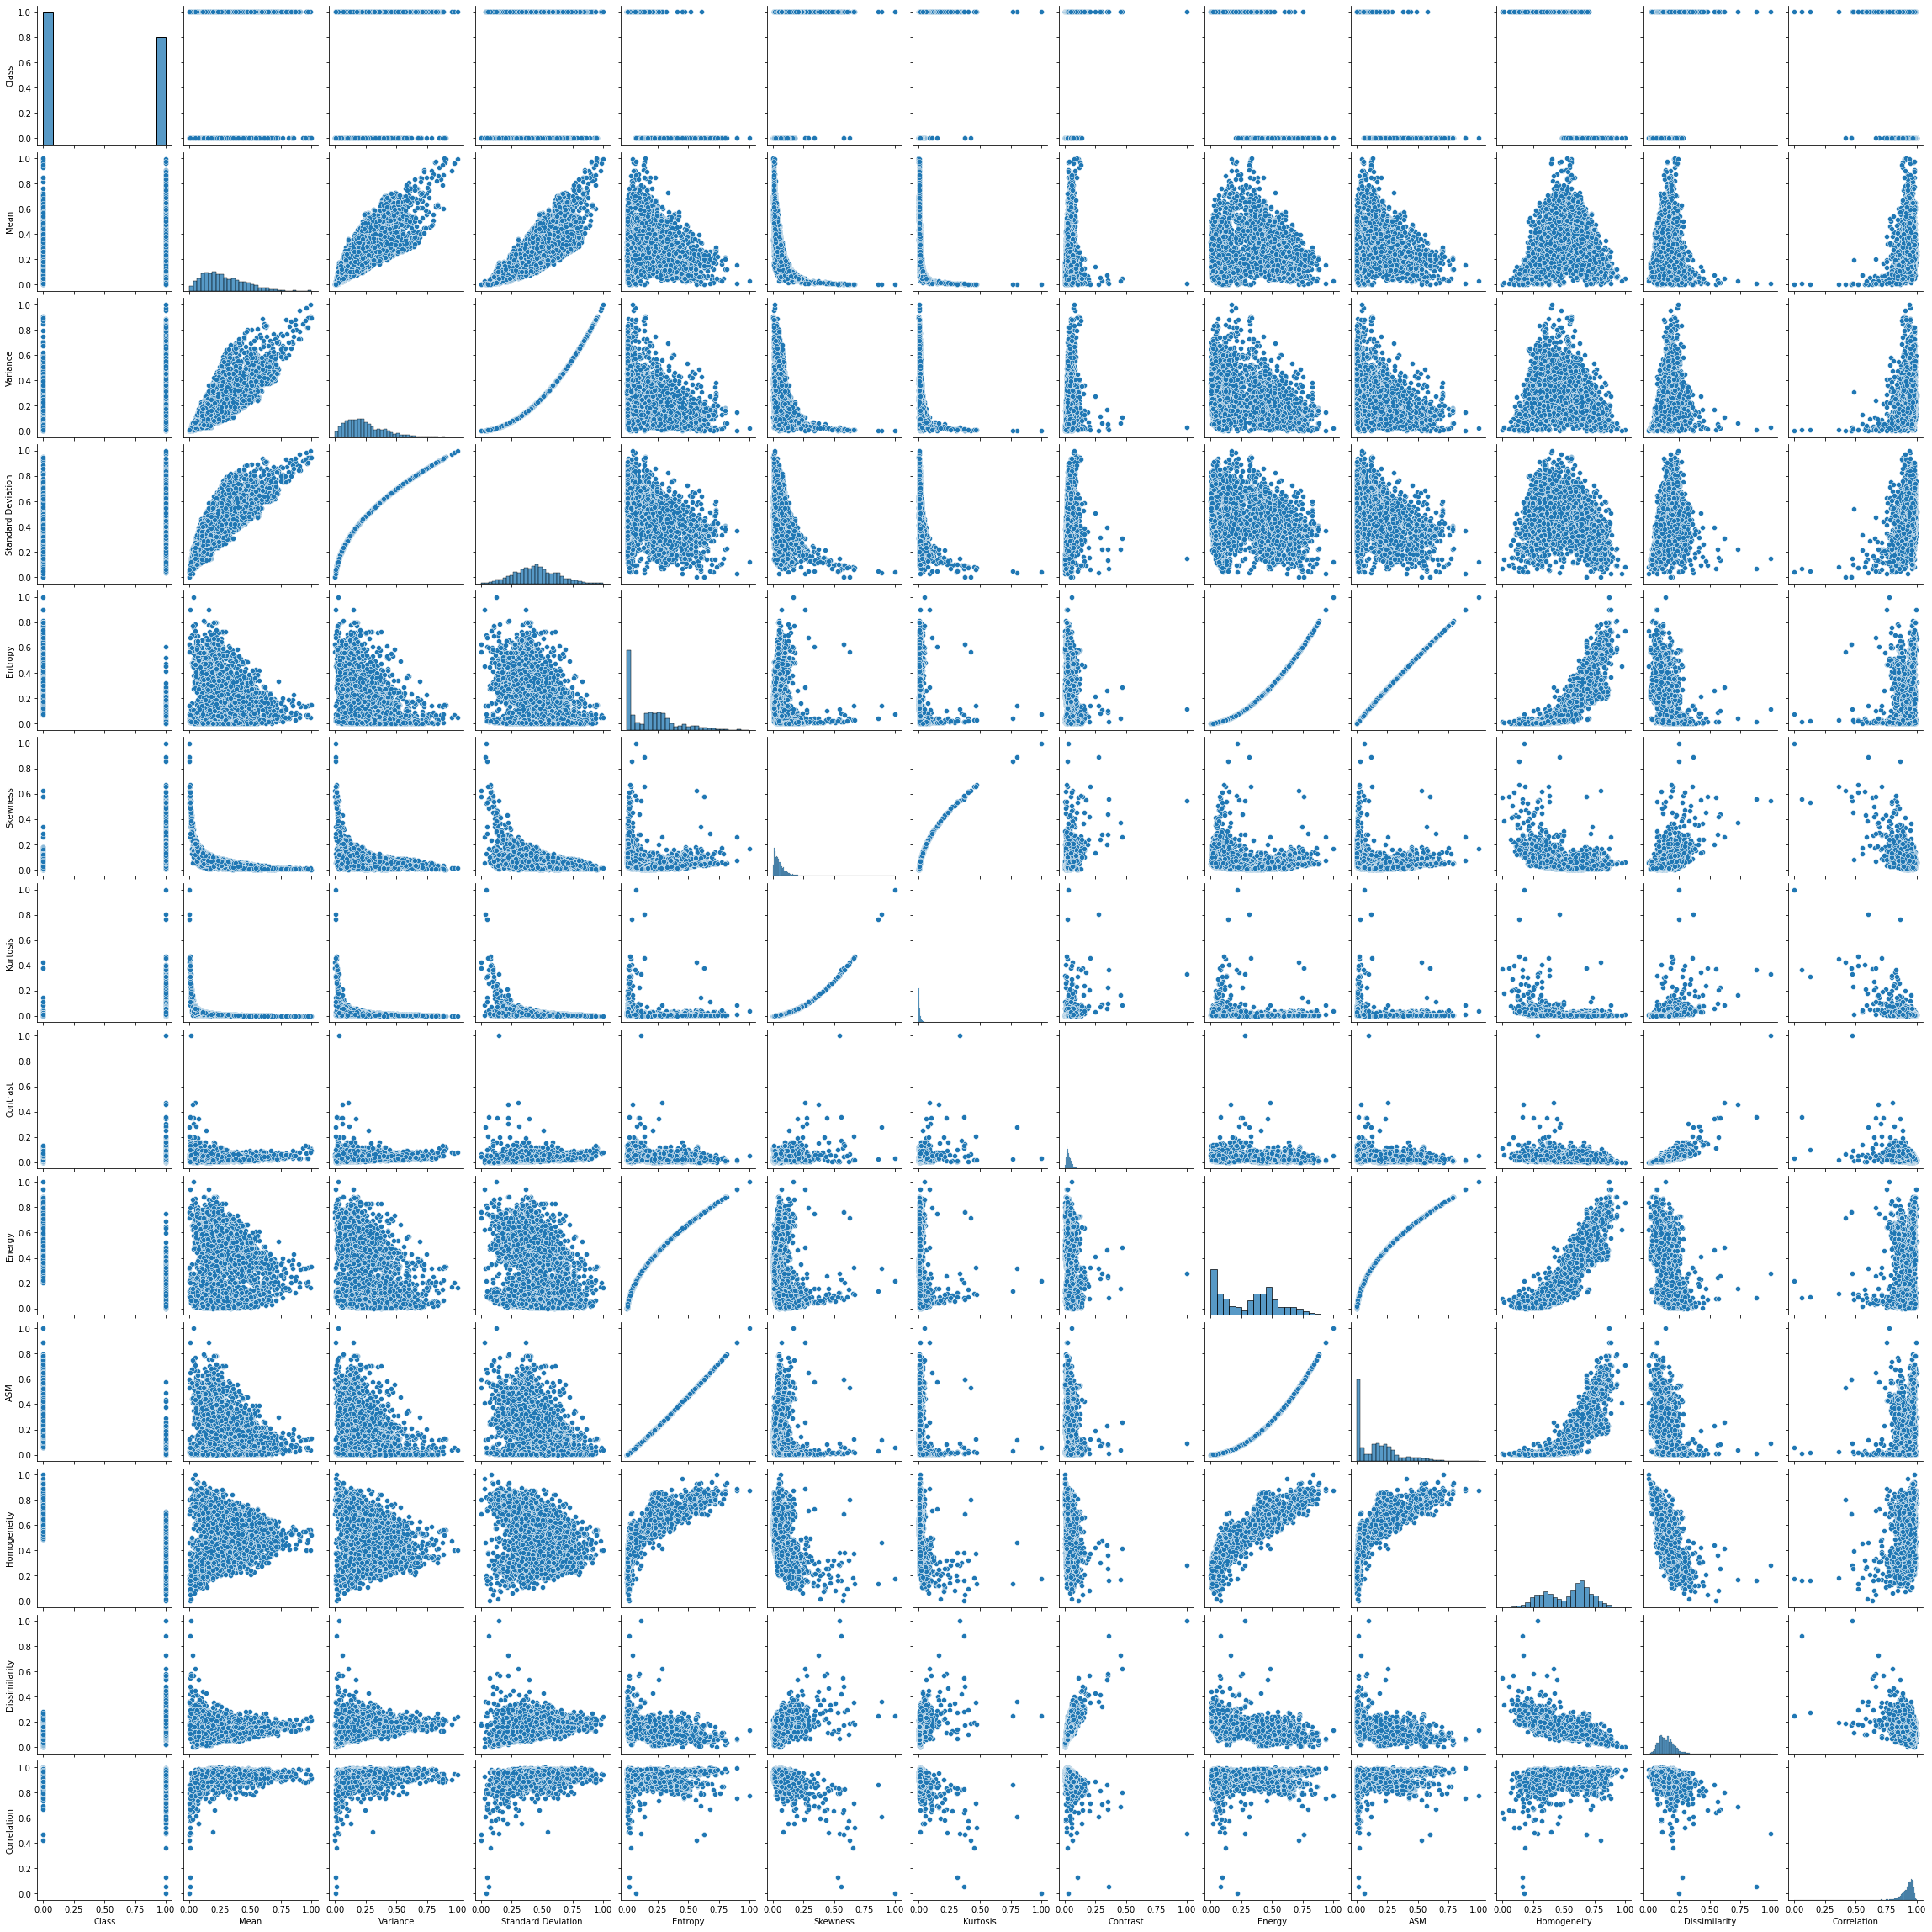

In [13]:
relacio = sns.pairplot(dataset)

In [12]:
attributes_df = dataset.loc[:,attributes]
attributes_df.describe()

,Variance,Standard Deviation,Entropy,Skewness,Energy,ASM,Homogeneity,Dissimilarity,Class
count,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000,3762.000
mean,0.243,0.449,0.185,0.063,0.319,0.167,0.530,0.148,0.447
std,0.161,0.168,0.179,0.073,0.229,0.168,0.181,0.068,0.497
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.124,0.331,0.015,0.021,0.079,0.012,0.368,0.101,0.000
50%,0.213,0.444,0.167,0.044,0.355,0.145,0.577,0.140,0.000
75%,0.331,0.562,0.286,0.079,0.485,0.256,0.666,0.186,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


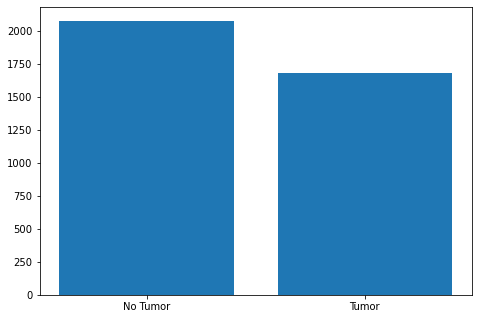

In [13]:
dataset['Class'].value_counts()[1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['No Tumor', 'Tumor']
values = [dataset['Class'].value_counts()[0],dataset['Class'].value_counts()[1]]
ax.bar(langs,values)
plt.show()
base_acc= dataset['Class'].value_counts()[0]/(dataset['Class'].value_counts()[0]+dataset['Class'].value_counts()[1])

In [14]:
#Data standarization and plotting information related to values
standarized_df = (attributes_df - attributes_df.mean()) / (attributes_df.std()) 

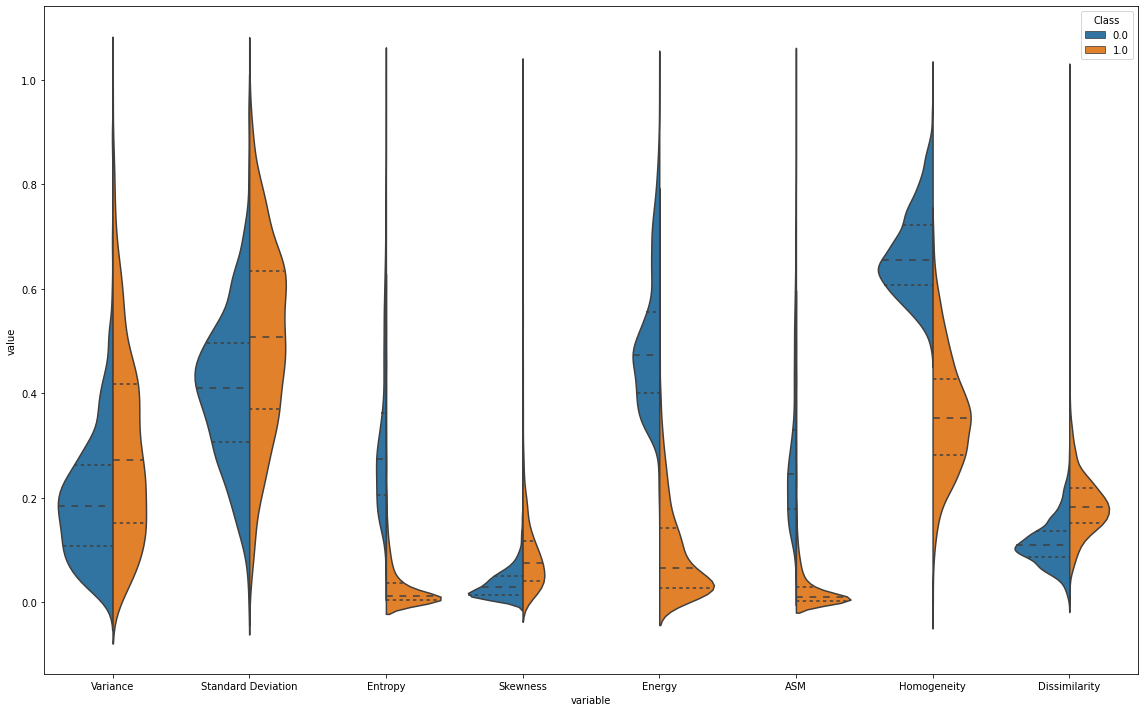

In [15]:
tumor_rel = dataset.Class
melted_data = pd.melt(attributes_df, id_vars = "Class")
plt.figure(figsize = (16,10))
sns.violinplot(x = "variable", y = "value", hue="Class", data = melted_data, split=True, inner="quartile")
plt.tight_layout()

In [16]:
variables = ["Entropy", "Energy", "ASM", "Homogeneity", "Dissimilarity"]
variablesIndex=[]
for i in range(len(variables)):
    variablesIndex.append(dataset.columns.get_loc(variables[i]))
variablesIndex

[4, 8, 9, 10, 11]

In [17]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr
def Logisticregression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LogisticRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

In [18]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.


predicted = []
for j,i in enumerate(variablesIndex):
    atribut2 = x[:,i].reshape(x.shape[0], 1) 
    regr = regression(atribut2, y) 
    predicted.append(regr.predict(atribut2))

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
# Mostrem l'error (MSE i R2)
for i in range(4):
    MSE = mse(y, predicted[i])
    r2 = r2_score(y, predicted[i])

    print("Mean squeared error attribute %s: %f" %(dataset.axes[1][variablesIndex[i]],MSE))
    print("R2 score: attribute %s: %f" %(dataset.axes[1][variablesIndex[i]],r2))
#accuracy multiple
i = 0
for pred in predicted:
    correcte = 0
    incorrecte = 0
    for labels,p in zip(y,pred):
        if((labels == 0 and p<0.5) or (labels == 1 and p>=0.5)):
            correcte +=1
        else:
            incorrecte +=1
    print("Fent servir l'atribut",dataset.axes[1][variablesIndex[i]],"obtenim un accuracy de",correcte/len(pred))
    i +=1


Mean squeared error attribute Entropy: 0.227068
R2 score: attribute Entropy: 0.081549
Mean squeared error attribute Energy: 0.236051
R2 score: attribute Energy: 0.045217
Mean squeared error attribute ASM: 0.063351
R2 score: attribute ASM: 0.743756
Mean squeared error attribute Homogeneity: 0.105085
R2 score: attribute Homogeneity: 0.574950
Fent servir l'atribut Entropy obtenim un accuracy de 0.652046783625731
Fent servir l'atribut Energy obtenim un accuracy de 0.5930356193514088
Fent servir l'atribut ASM obtenim un accuracy de 0.9731525784157363
Fent servir l'atribut Homogeneity obtenim un accuracy de 0.9292929292929293
Fent servir l'atribut Dissimilarity obtenim un accuracy de 0.9481658692185008


In [251]:
#attributes.remove('Class')
y = dataset.iloc[:,0]
X = dataset.loc[:,attributes]
joblib.dump(y, 'y.pkl')
joblib.dump(X, 'x.pkl')
joblib.dump(dataset,'dataset.pkl')
joblib.dump(attributes,'atributes.pkl')

['atributes.pkl']

In [20]:
dataset.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,0.000,0.195,0.212,0.443,0.275,0.068,0.011,0.028,0.475,0.246,0.603,0.140,0.982
1,0.000,0.261,0.276,0.510,0.675,0.052,0.008,0.018,0.797,0.648,0.774,0.094,0.997
2,1.000,0.219,0.392,0.614,0.001,0.091,0.016,0.023,0.013,0.001,0.231,0.195,0.973
3,1.000,0.177,0.329,0.560,0.002,0.108,0.022,0.044,0.013,0.001,0.196,0.259,0.941
4,0.000,0.218,0.250,0.484,0.371,0.068,0.011,0.051,0.565,0.339,0.561,0.227,0.961


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [102]:
from sklearn.neural_network import MLPClassifier
import time

models = [LogisticRegression(random_state=123), DecisionTreeClassifier(random_state=123), RandomForestClassifier(random_state=123), 
          AdaBoostClassifier(random_state=123), xgb.XGBClassifier(random_state=123), MLPClassifier(random_state=123)]
model_names = ["Logistic", "Decision Tree", "Random Forest", "Ada Boost", "XGBoost", "Neural Network"]
false_negative = []
idx= 0
tbl = PrettyTable()
tbl.field_names = ['Model', 'Accuracy', 'Temps']
for m in models: 
    start = time.time()
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    end = time.time()
    tbl.add_row([model_names[idx], score, end-start])
    pred = m.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
    false_negative.append(fn)
    #print(f"Utilitzant el model {model_names[idx]} obtenim una accuracy de: {m.score(X_train,y_train)}")
    idx+=1

print(tbl)

print(f"El model més preocupant és el {model_names[false_negative.index(max(false_negative))]} amb {max(false_negative)} falsos negatius")
print(f"El model més bo és el {model_names[false_negative.index(min(false_negative))]} amb {min(false_negative)} falsos negatius")


[12:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
+----------------+--------------------+----------------------+
|     Model      |      Accuracy      |        Temps         |
+----------------+--------------------+----------------------+
|    Logistic    | 0.9734395750332006 | 0.024935007095336914 |
| Decision Tree  | 0.9867197875166003 | 0.02293705940246582  |
| Random Forest  | 0.9880478087649402 | 0.36281871795654297  |
|   Ada Boost    | 0.9893758300132802 | 0.18871140480041504  |
|    XGBoost     | 0.9920318725099602 | 0.30359482765197754  |
| Neural Network | 0.9814077025232404 |  4.555486440658569   |
+----------------+--------------------+----------------------+
El model més preocupant és el Logistic amb 14 falsos negatiu

In [23]:
#HYPERPARAMETER TUNING MODELS
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [24]:
#LOGISTIC REGRESSION
penalty = ['l1', 'l2','elasticnet','none']

dual = [True, False]

tol = [x for x in np.linspace(1e-4, 0.1, num = 50)]

C = [x for x in np.linspace(0.001,10, num = 50)]

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_grid = {'penalty': penalty,
               'dual': dual,
               'tol':tol,
               'C': C,
               'solver': solver}

In [25]:
lr = LogisticRegression(random_state=123)
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = lr_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.20506122448979594,
                                              0.4091224489795919,
                                              0.6131836734693878,
                                              0.8172448979591838,
                                              1.0213061224489797,
                                              1.2253673469387756,
                                              1.4294285714285715,
                                              1.6334897959183674,
                                              1.8375510204081633,
                                              2.0416122448979594,
                                              2.2456734693877554,
                                              2.44973469387755...
                                                0.028642857142857144,
               

In [103]:
lr_random.best_params_

{'tol': 0.0673795918367347,
 'solver': 'lbfgs',
 'penalty': 'none',
 'dual': False,
 'C': 8.979693877551021}

In [104]:
base_model = LogisticRegression(random_state = 123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9734395750332006

In [105]:
best_random = lr_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9840637450199203

In [106]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.09%.


In [30]:
#DECISION TREE
# Number of features to consider at every split

criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 110)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
dt_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [31]:
dt = DecisionTreeClassifier(random_state=123)
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = dt_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 21, 22, 23, 24, 25,
                                                      26, 27, 28, 29, 30, 31,
                                                      32, 32, 33, 34, 35, 36, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=123, verbose=2)

In [62]:
dt_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 74,
 'criterion': 'entropy'}

In [107]:
base_model = DecisionTreeClassifier(random_state = 123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9867197875166003

In [108]:
best_random = dt_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9893758300132802

In [109]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.27%.


In [67]:
#RANDOM FOREST

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 4000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 110)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [68]:
rf = RandomForestClassifier(random_state=123)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 22.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 21, 22, 23, 24, 25,
                                                      26, 27, 28, 29, 30, 31,
                                                      32, 32, 33, 34, 35, 36, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 139, 178, 218,
                                                         

In [110]:
rf_random.best_params_

{'n_estimators': 1045,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 54,
 'bootstrap': True}

In [111]:

base_model = RandomForestClassifier(random_state = 123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9880478087649402

In [112]:
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9933598937583001

In [113]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.54%.


In [94]:
#ADA BOOST CLASSIFIER
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 4000, num = 100)]
#Algorithm to use
algorithm = ['SAMME', 'SAMME.R']
# weight to each classifier
learning_rate = [x for x in np.linspace(0.001, 1, num = 100)]
# Create the random grid
ada_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'algorithm': algorithm
              }


In [95]:
ada = AdaBoostClassifier(random_state=123)
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = ada_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
ada_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 18.7min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.001,
                                                          0.011090909090909092,
                                                          0.021181818181818184,
                                                          0.03127272727272727,
                                                          0.041363636363636366,
                                                          0.05145454545454546,
                                                          0.06154545454545455,
                                                          0.07163636363636364,
                                                          0.08172727272727273,
                                                          0.09181818181818183...
                             

In [114]:
ada_random.best_params_

{'n_estimators': 3281,
 'learning_rate': 0.3440909090909091,
 'algorithm': 'SAMME'}

In [115]:
base_model = AdaBoostClassifier(random_state = 123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9893758300132802

In [116]:
best_random = ada_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.99867197875166

In [117]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.94%.


In [45]:
#XGBOOST
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 4000, num = 100)]

max_depth = [int(x) for x in range (3,18,1)]

gamma = [int(x) for x in range(1,9,1)]

reg_alpha = [int(x) for x in range(40,180,5)]

reg_lambda = [int(x) for x in range(0,1)]

colsample = [i/10.0 for i in range(6,10)]

xgb_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
                'reg_alpha':reg_alpha,
                'reg_lambda':reg_lambda,
                'colsample_bytree':colsample
              }
pprint(xgb_grid)


{'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
 'gamma': [1, 2, 3, 4, 5, 6, 7, 8],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 'n_estimators': [100,
                  139,
                  178,
                  218,
                  257,
                  296,
                  336,
                  375,
                  415,
                  454,
                  493,
                  533,
                  572,
                  612,
                  651,
                  690,
                  730,
                  769,
                  809,
                  848,
                  887,
                  927,
                  966,
                  1006,
                  1045,
                  1084,
                  1124,
                  1163,
                  1203,
                  1242,
                  1281,
                  1321,
                  1360,
                  1400,
                  1439,
                  1478,
           

In [46]:
xb = xgb.XGBClassifier(random_state=123)
xb_random = RandomizedSearchCV(estimator = xb, param_distributions = xgb_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
xb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 17.8min finished


[16:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                        

In [118]:
base_model = xgb.XGBClassifier(random_state = 123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

[12:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9920318725099602

In [119]:
best_random = xb_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9880478087649402

In [120]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.40%.


In [39]:
#MULTI LAYER PERCEPTRON
mlp_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [40]:
mlp = MLPClassifier(random_state=123)
mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = mlp_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
mlp_random.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=123), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=123, verbose=2)

In [121]:
base_model = MLPClassifier(random_state=123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9814077025232404

In [122]:
best_random = mlp_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9840637450199203

In [123]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.27%.


In [25]:
#Models diversos de SVM
from sklearn import svm
svm_models= [svm.SVC(kernel='linear', C=10, random_state=123),
              svm.LinearSVC(C=10, max_iter=1000000,random_state=123),
              svm.SVC(kernel='rbf',  C=10,random_state=123),
              svm.SVC(kernel='poly',degree=4, C=10,random_state=123),
              svm.SVC(kernel='sigmoid', C=10,random_state=123)]
svm_kernels = ["Linear","SVC Linear", "RBF", "Polyniomical", "Sigmoid"]
idx= 0
svmtbl = PrettyTable()
svmtbl.field_names = ['Model', 'Accuracy', 'Temps']
svm_fn = []
for svm in svm_models:
    start =  time.time()
    svm.fit(X_train, y_train)
    score = svm.score(X_train,y_train)
    end = time.time()
    svmtbl.add_row([svm_kernels[idx], score, end-start])
    pred = svm.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
    svm_fn.append(fn)
    #print(f"Utilitzant el kernel {svm_kernels[idx]} obtenim una accuracy de: {svm.score(X_train,y_train)}")
    idx+=1
print(svmtbl)
print(f"El SVM més preocupant és el {svm_kernels[svm_fn.index(max(svm_fn))]} amb {max(svm_fn)} falsos negatius")
print(f"El SVM més bo és el {svm_kernels[svm_fn.index(min(svm_fn))]} amb {min(svm_fn)} falsos negatius")

+--------------+--------------------+----------------------+
|    Model     |      Accuracy      |        Temps         |
+--------------+--------------------+----------------------+
|    Linear    | 0.9813891658358258 | 0.10700035095214844  |
|  SVC Linear  | 0.9807244931871053 | 0.026999950408935547 |
|     RBF      | 0.9847125290794284 |  0.1490004062652588  |
| Polyniomical | 0.9887005649717514 | 0.20400023460388184  |
|   Sigmoid    | 0.5480225988700564 |  0.7249929904937744  |
+--------------+--------------------+----------------------+
El SVM més preocupant és el Sigmoid amb 162 falsos negatius
El SVM més bo és el Polyniomical amb 4 falsos negatius


In [26]:
print(f"Tot i així, el kernel sigmoid no el considerem optim a mirar ja que si predisim sempre la mateixa classe, és a dir si sempre diem que el pacient no te tumor obtindirem millor precisió que seria del {round(base_acc*100,2)}%")

Tot i així, el kernel sigmoid no el considerem optim a mirar ja que si predisim sempre la mateixa classe, és a dir si sempre diem que el pacient no te tumor obtindirem millor precisió que seria del 55.26%


In [218]:
C = [x for x in np.linspace(start = 0.001, stop = 10, num = 1000)]


linear = {'C': C,
              }
pprint(linear)


{'C': [0.001,
       0.011009009009009009,
       0.02101801801801802,
       0.031027027027027032,
       0.04103603603603604,
       0.05104504504504505,
       0.06105405405405406,
       0.07106306306306306,
       0.08107207207207208,
       0.0910810810810811,
       0.1010900900900901,
       0.11109909909909911,
       0.12110810810810813,
       0.13111711711711713,
       0.14112612612612613,
       0.15113513513513516,
       0.16114414414414416,
       0.17115315315315316,
       0.1811621621621622,
       0.1911711711711712,
       0.2011801801801802,
       0.21118918918918922,
       0.22119819819819822,
       0.23120720720720722,
       0.24121621621621625,
       0.2512252252252252,
       0.26123423423423425,
       0.2712432432432433,
       0.28125225225225226,
       0.2912612612612613,
       0.3012702702702703,
       0.3112792792792793,
       0.3212882882882883,
       0.33129729729729734,
       0.3413063063063063,
       0.35131531531531535,
       0.3613243

In [219]:
svm_linear = svm.SVC(kernel='linear',random_state=123)
sl_random = RandomizedSearchCV(estimator = svm_linear, param_distributions = linear, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
sl_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished


RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.011009009009009009,
                                              0.02101801801801802,
                                              0.031027027027027032,
                                              0.04103603603603604,
                                              0.05104504504504505,
                                              0.06105405405405406,
                                              0.07106306306306306,
                                              0.08107207207207208,
                                              0.0910810810810811,
                                              0.1010900900900901,
                                              0.11109909909909911,
                                              0.121...
                                              0.13111711711711713,
                 

In [220]:
sl_random.best_params_

{'C': 9.859873873873875}

In [221]:
base_model = svm.SVC(kernel='linear',random_state=123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9760956175298805

In [222]:
best_random = sl_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9853917662682603

In [224]:
C = [x for x in np.linspace(start = 0.001, stop = 10, num = 1000)]

penalty = ['l1','l2']

loss = ['hinge', 'squared_hinge']

dual = [True, False]

max_iter = [int(x) for x in np.linspace(start = 1000, stop = 100000, num=1000)]


svclinear = {'C': C,
          'penalty':penalty,
          'loss':loss,
          'dual':dual,
          'max_iter':max_iter
              }
pprint(svclinear)


{'C': [0.001,
       0.011009009009009009,
       0.02101801801801802,
       0.031027027027027032,
       0.04103603603603604,
       0.05104504504504505,
       0.06105405405405406,
       0.07106306306306306,
       0.08107207207207208,
       0.0910810810810811,
       0.1010900900900901,
       0.11109909909909911,
       0.12110810810810813,
       0.13111711711711713,
       0.14112612612612613,
       0.15113513513513516,
       0.16114414414414416,
       0.17115315315315316,
       0.1811621621621622,
       0.1911711711711712,
       0.2011801801801802,
       0.21118918918918922,
       0.22119819819819822,
       0.23120720720720722,
       0.24121621621621625,
       0.2512252252252252,
       0.26123423423423425,
       0.2712432432432433,
       0.28125225225225226,
       0.2912612612612613,
       0.3012702702702703,
       0.3112792792792793,
       0.3212882882882883,
       0.33129729729729734,
       0.3413063063063063,
       0.35131531531531535,
       0.3613243

In [225]:
svm_svclinear = svm.LinearSVC(random_state=123)
svcl_random = RandomizedSearchCV(estimator = svm_svclinear, param_distributions = svclinear, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
svcl_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.0s finished


RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=123), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.011009009009009009,
                                              0.02101801801801802,
                                              0.031027027027027032,
                                              0.04103603603603604,
                                              0.05104504504504505,
                                              0.06105405405405406,
                                              0.07106306306306306,
                                              0.08107207207207208,
                                              0.0910810810810811,
                                              0.1010900900900901,
                                              0.11109909909909911,
                                              0.1211081081081...
                                              0.26123423423423425,
                  

In [227]:
svcl_random.best_params_

{'penalty': 'l1',
 'max_iter': 96828,
 'loss': 'squared_hinge',
 'dual': False,
 'C': 6.206585585585587}

In [228]:
base_model = svm.LinearSVC(random_state=123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9800796812749004

In [229]:
best_random = svcl_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9840637450199203

In [230]:
C = [x for x in np.linspace(start = 0.001, stop = 10, num = 1000)]

gamma = ['scale','auto']


rbf = {'C': C,
          'gamma':gamma
              }
pprint(rbf)

{'C': [0.001,
       0.011009009009009009,
       0.02101801801801802,
       0.031027027027027032,
       0.04103603603603604,
       0.05104504504504505,
       0.06105405405405406,
       0.07106306306306306,
       0.08107207207207208,
       0.0910810810810811,
       0.1010900900900901,
       0.11109909909909911,
       0.12110810810810813,
       0.13111711711711713,
       0.14112612612612613,
       0.15113513513513516,
       0.16114414414414416,
       0.17115315315315316,
       0.1811621621621622,
       0.1911711711711712,
       0.2011801801801802,
       0.21118918918918922,
       0.22119819819819822,
       0.23120720720720722,
       0.24121621621621625,
       0.2512252252252252,
       0.26123423423423425,
       0.2712432432432433,
       0.28125225225225226,
       0.2912612612612613,
       0.3012702702702703,
       0.3112792792792793,
       0.3212882882882883,
       0.33129729729729734,
       0.3413063063063063,
       0.35131531531531535,
       0.3613243

In [231]:
svm_rbf = svm.SVC(kernel='rbf',random_state=123)
rbf_random = RandomizedSearchCV(estimator = svm_rbf, param_distributions = rbf, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
rbf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished


RandomizedSearchCV(cv=5, estimator=SVC(random_state=123), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.011009009009009009,
                                              0.02101801801801802,
                                              0.031027027027027032,
                                              0.04103603603603604,
                                              0.05104504504504505,
                                              0.06105405405405406,
                                              0.07106306306306306,
                                              0.08107207207207208,
                                              0.0910810810810811,
                                              0.1010900900900901,
                                              0.11109909909909911,
                                              0.12110810810810813,
                                              0...
                                              0.151135135

In [232]:
rbf_random.best_params_

{'gamma': 'scale', 'C': 9.08918018018018}

In [233]:
base_model = svm.SVC(kernel='rbf',random_state=123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9827357237715804

In [234]:
best_random = rbf_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9867197875166003

In [237]:
C = [x for x in np.linspace(start = 0.001, stop = 10, num = 1000)]

gamma = ['scale','auto']

degree = [int(x) for x in np.linspace(start = 3, stop=20, num =17)]

coef0 = [x for x in np.linspace(start= 0.0,stop= 1,num=100)]




poly = {'C': C,
          'gamma':gamma,
       'degree':degree,
       'coef0':coef0
              }
pprint(poly)

{'C': [0.001,
       0.011009009009009009,
       0.02101801801801802,
       0.031027027027027032,
       0.04103603603603604,
       0.05104504504504505,
       0.06105405405405406,
       0.07106306306306306,
       0.08107207207207208,
       0.0910810810810811,
       0.1010900900900901,
       0.11109909909909911,
       0.12110810810810813,
       0.13111711711711713,
       0.14112612612612613,
       0.15113513513513516,
       0.16114414414414416,
       0.17115315315315316,
       0.1811621621621622,
       0.1911711711711712,
       0.2011801801801802,
       0.21118918918918922,
       0.22119819819819822,
       0.23120720720720722,
       0.24121621621621625,
       0.2512252252252252,
       0.26123423423423425,
       0.2712432432432433,
       0.28125225225225226,
       0.2912612612612613,
       0.3012702702702703,
       0.3112792792792793,
       0.3212882882882883,
       0.33129729729729734,
       0.3413063063063063,
       0.35131531531531535,
       0.3613243

In [238]:
svm_poly = svm.SVC(kernel='poly',random_state=123)
poly_random = RandomizedSearchCV(estimator = svm_poly, param_distributions = poly, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
poly_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 33.6min finished


RandomizedSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.011009009009009009,
                                              0.02101801801801802,
                                              0.031027027027027032,
                                              0.04103603603603604,
                                              0.05104504504504505,
                                              0.06105405405405406,
                                              0.07106306306306306,
                                              0.08107207207207208,
                                              0.0910810810810811,
                                              0.1010900900900901,
                                              0.11109909909909911,
                                              0.12110...
                                                  0.18181818181818182,
             

In [239]:
poly_random.best_params_

{'gamma': 'scale',
 'degree': 4,
 'coef0': 0.22222222222222224,
 'C': 3.7343603603603603}

In [240]:
base_model = svm.SVC(kernel='poly',random_state=123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.9853917662682603

In [241]:
best_random = poly_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9907038512616202

In [242]:
C = [x for x in np.linspace(start = 0.001, stop = 10, num = 1000)]

gamma = ['scale','auto']

coef0 = [x for x in np.linspace(start= 0.0,stop= 1,num=100)]




sigmoid = {'C': C,
        'gamma':gamma,
       'coef0':coef0
              }
pprint(sigmoid)

{'C': [0.001,
       0.011009009009009009,
       0.02101801801801802,
       0.031027027027027032,
       0.04103603603603604,
       0.05104504504504505,
       0.06105405405405406,
       0.07106306306306306,
       0.08107207207207208,
       0.0910810810810811,
       0.1010900900900901,
       0.11109909909909911,
       0.12110810810810813,
       0.13111711711711713,
       0.14112612612612613,
       0.15113513513513516,
       0.16114414414414416,
       0.17115315315315316,
       0.1811621621621622,
       0.1911711711711712,
       0.2011801801801802,
       0.21118918918918922,
       0.22119819819819822,
       0.23120720720720722,
       0.24121621621621625,
       0.2512252252252252,
       0.26123423423423425,
       0.2712432432432433,
       0.28125225225225226,
       0.2912612612612613,
       0.3012702702702703,
       0.3112792792792793,
       0.3212882882882883,
       0.33129729729729734,
       0.3413063063063063,
       0.35131531531531535,
       0.3613243

In [243]:
svm_sig = svm.SVC(kernel='sigmoid',random_state=123)
sig_random = RandomizedSearchCV(estimator = svm_sig, param_distributions = sigmoid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)
# Fit the random search model
sig_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:   16.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.4s finished


RandomizedSearchCV(cv=5, estimator=SVC(kernel='sigmoid', random_state=123),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.011009009009009009,
                                              0.02101801801801802,
                                              0.031027027027027032,
                                              0.04103603603603604,
                                              0.05104504504504505,
                                              0.06105405405405406,
                                              0.07106306306306306,
                                              0.08107207207207208,
                                              0.0910810810810811,
                                              0.1010900900900901,
                                              0.11109909909909911,
                                              0.12...
                                                  0.15151515151515152,
             

In [244]:
sig_random.best_params_

{'gamma': 'auto', 'coef0': 0.25252525252525254, 'C': 9.789810810810812}

In [245]:
base_model = svm.SVC(kernel='sigmoid',random_state=123)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

base_accuracy = metrics.accuracy_score(y_test, y_pred)
base_accuracy

0.5590969455511288

In [246]:
best_random = sig_random.best_estimator_
y_pred=best_random.predict(X_test)
best_random.score(X_test,y_test)


random_accuracy = metrics.accuracy_score(y_test, y_pred)
random_accuracy

0.9734395750332006

[10:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


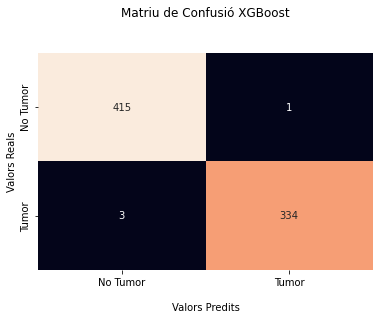

In [27]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

xb = xgb.XGBClassifier(random_state=123)
xb.fit(X_train, y_train)
xb_prediction = xb.predict(X_test)
cm_rf = confusion_matrix(y_test,xb_prediction)
cm_rf_m = pd.DataFrame(cm_rf, index = ["No Tumor","Tumor"], columns = ["No Tumor",'Tumor'])
ax = sns.heatmap(cm_rf_m,annot=True,fmt="d", cbar=False)
ax.set_title('Matriu de Confusió XGBoost\n\n');
ax.set_xlabel('\nValors Predits')
ax.set_ylabel('Valors Reals');


#label_aux.set_xlabel('Predicted Value');label_aux.set_ylabel('True Value')


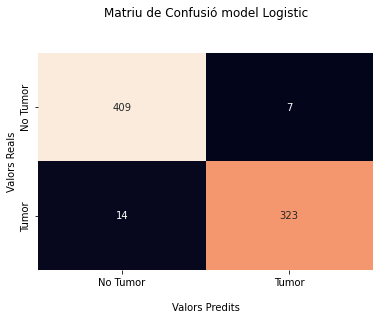

In [28]:
logi = LogisticRegression(random_state=123)
logi.fit(X_train, y_train)
logi_prediction = logi.predict(X_test)
cm_rf = confusion_matrix(y_test,logi_prediction)
cm_rf_m = pd.DataFrame(cm_rf, index = ["No Tumor","Tumor"], columns = ["No Tumor",'Tumor'])
ax = sns.heatmap(cm_rf_m,annot=True,fmt="d", cbar=False)
ax.set_title('Matriu de Confusió model Logistic\n\n');
ax.set_xlabel('\nValors Predits')
ax.set_ylabel('Valors Reals');

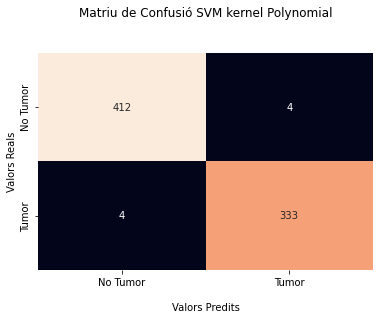

In [29]:
from sklearn import svm
poly = svm.SVC(kernel='poly',degree=4, C=10,random_state=123)
poly.fit(X_train, y_train)
poly_prediction = poly.predict(X_test)
cm_rf = confusion_matrix(y_test,poly_prediction)
cm_rf_m = pd.DataFrame(cm_rf, index = ["No Tumor","Tumor"], columns = ["No Tumor",'Tumor'])
ax = sns.heatmap(cm_rf_m,annot=True,fmt="d", cbar=False)
ax.set_title('Matriu de Confusió SVM kernel Polynomial\n\n');
ax.set_xlabel('\nValors Predits')
ax.set_ylabel('Valors Reals');

In [30]:
###ANALITZEM IMATGES

In [31]:
!pip install torchvision

In [124]:
from torchvision import models
import torch

In [125]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [34]:
alexnet = models.alexnet(pretrained=True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [154]:
from PIL import Image
from skimage import io, transform

In [126]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tarfile

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from collections import Counter

In [52]:
print(f"""Total Number of Images for each Class:
    Class 0 (No Tumor): {image_df[image_df['Class']==0].count()[0]}
    Class 1 (Tumor): {image_df[image_df['Class']==1].count()[0]}""")

Total Number of Images for each Class:
    Class 0 (No Tumor): 2079
    Class 1 (Tumor): 1683


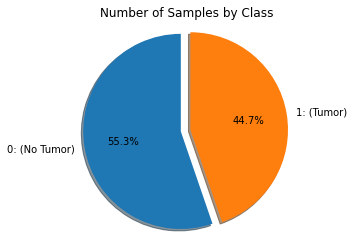

<Figure size 432x288 with 0 Axes>

In [53]:
labels = "0: (No Tumor)", "1: (Tumor)"
total = len(image_df)
no_tumor= image_df[image_df['Class']==0].count()[0]
tumor=image_df[image_df['Class']==1].count()[0]
sizes = [no_tumor/total, tumor/total]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Number of Samples by Class")
plt.show()
plt.savefig("number_of_samples_breakdown")

In [54]:
int(len(image_df)*0.2)

752

In [55]:
image_df

,Image,Class,paths
0,Image1,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
1,Image2,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
2,Image3,1,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
3,Image4,1,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
4,Image5,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
...,...,...,...
3757,Image3758,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
3758,Image3759,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
3759,Image3760,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...
3760,Image3761,0,F:\Biblioteca\Documents\UAB\3r\Aprenentatge Co...


In [56]:
data_dir = os.getcwd()
folder_name = "Brain Tumor"
image_folders = os.path.join(data_dir, folder_name)

file = os.listdir(image_folders)
file

['Image1.jpg',
 'Image10.jpg',
 'Image100.jpg',
 'Image1000.jpg',
 'Image1001.jpg',
 'Image1002.jpg',
 'Image1003.jpg',
 'Image1004.jpg',
 'Image1005.jpg',
 'Image1006.jpg',
 'Image1007.jpg',
 'Image1008.jpg',
 'Image1009.jpg',
 'Image101.jpg',
 'Image1010.jpg',
 'Image1011.jpg',
 'Image1012.jpg',
 'Image1013.jpg',
 'Image1014.jpg',
 'Image1015.jpg',
 'Image1016.jpg',
 'Image1017.jpg',
 'Image1018.jpg',
 'Image1019.jpg',
 'Image102.jpg',
 'Image1020.jpg',
 'Image1021.jpg',
 'Image1022.jpg',
 'Image1023.jpg',
 'Image1024.jpg',
 'Image1025.jpg',
 'Image1026.jpg',
 'Image1027.jpg',
 'Image1028.jpg',
 'Image1029.jpg',
 'Image103.jpg',
 'Image1030.jpg',
 'Image1031.jpg',
 'Image1032.jpg',
 'Image1033.jpg',
 'Image1034.jpg',
 'Image1035.jpg',
 'Image1036.jpg',
 'Image1037.jpg',
 'Image1038.jpg',
 'Image1039.jpg',
 'Image104.jpg',
 'Image1040.jpg',
 'Image1041.jpg',
 'Image1042.jpg',
 'Image1043.jpg',
 'Image1044.jpg',
 'Image1045.jpg',
 'Image1046.jpg',
 'Image1047.jpg',
 'Image1048.jpg',
 '

In [57]:
new_folder = "Tumor"
os.mkdir(new_folder)

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: 'Tumor'

In [58]:
image_tumor= []
for i in image_df.index:
    if(image_df['Class'][i] == 1):
        image_tumor.append(image_df['Image'][i])
        

In [47]:
import glob
import shutil
import os

src_dir = os.path.join(data_dir, folder_name)
dst_dir = os.path.join(data_dir, new_folder)

for i in image_tumor:
    for jpgfile in glob.iglob(os.path.join(src_dir, f"{i}.jpg")):
        shutil.copy(jpgfile, dst_dir)

NameError: name 'folder_name' is not defined

In [59]:
no_tumor = "No Tumor"
#os.mkdir(no_tumor)
image_no_tumor= []
for i in image_df.index:
    if(image_df['Class'][i] == 0):
        image_no_tumor.append(image_df['Image'][i])
        
src_dir = os.path.join(data_dir, folder_name)
dst_dir = os.path.join(data_dir, no_tumor)

for i in image_no_tumor:
    for jpgfile in glob.iglob(os.path.join(src_dir, f"{i}.jpg")):
        shutil.copy(jpgfile, dst_dir)

In [62]:
BASE_PATH = os.getcwd()

In [63]:
image= []
labels=[]

for file in os.listdir(BASE_PATH):
    if file == 'No Tumor':
        for c in os.listdir(os.path.join(BASE_PATH,file)):
            image.append(c)
            labels.append('No Tumor')
    if file == 'Tumor':
        for c in os.listdir(os.path.join(BASE_PATH,file)):
            image.append(c)
            labels.append('Tumor')
            
data = {'Images':image, 'labels':labels} 
data = pd.DataFrame(data) 


In [64]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['encoded_labels'] = lb.fit_transform(data['labels'])
data.head()

,Images,labels,encoded_labels
0,Image1.jpg,No Tumor,0
1,Image100.jpg,No Tumor,0
2,Image1000.jpg,No Tumor,0
3,Image1001.jpg,No Tumor,0
4,Image1002.jpg,No Tumor,0


In [127]:
from __future__ import print_function 
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.9.1+cpu
Torchvision Version:  0.10.1+cpu


In [137]:
actual_dir = os.getcwd() 
folder_name="Brain Tumor"
data_dir = os.path.join(actual_dir, folder_name)

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "squeezenet"

# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 32

# Number of epochs to train for 
num_epochs = 50

# Flag for feature extracting. When False, we finetune the whole model, 
#   when True we only update the reshaped layer params
feature_extract = True

In [129]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []
    train_acc = []
    loss_hist = []
    train_loss= []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                loss_hist.append(epoch_loss)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,train_loss, train_acc, val_acc_history, loss_hist

In [130]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [131]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes) 
        input_size = 224

    elif model_name == "inception":
        """ Inception v3 
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()
    
    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to C:\Users\marcl/.cache\torch\hub\checkpoints\squeezenet1_0-b66bff10.pth



SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
  

In [132]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [133]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 classifier.1.weight
	 classifier.1.bias


In [138]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, train_loss, train_acc, hist, loss = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/49
----------
train Loss: 0.3175 Acc: 0.8684
val Loss: 0.2984 Acc: 0.8816

Epoch 1/49
----------
train Loss: 0.3261 Acc: 0.8595
val Loss: 0.3135 Acc: 0.8883

Epoch 2/49
----------
train Loss: 0.3367 Acc: 0.8502
val Loss: 0.3136 Acc: 0.8896

Epoch 3/49
----------
train Loss: 0.3263 Acc: 0.8645
val Loss: 0.2931 Acc: 0.9029

Epoch 4/49
----------
train Loss: 0.3048 Acc: 0.8711
val Loss: 0.3074 Acc: 0.8803

Epoch 5/49
----------
train Loss: 0.3181 Acc: 0.8678
val Loss: 0.2973 Acc: 0.8949

Epoch 6/49
----------
train Loss: 0.3209 Acc: 0.8621
val Loss: 0.3041 Acc: 0.8923

Epoch 7/49
----------
train Loss: 0.3204 Acc: 0.8678
val Loss: 0.3661 Acc: 0.8471

Epoch 8/49
----------
train Loss: 0.3434 Acc: 0.8512
val Loss: 0.3387 Acc: 0.8684

Epoch 9/49
----------
train Loss: 0.3064 Acc: 0.8731
val Loss: 0.2983 Acc: 0.8963

Epoch 10/49
----------
train Loss: 0.3100 Acc: 0.8681
val Loss: 0.2963 Acc: 0.9082

Epoch 11/49
----------
train Loss: 0.3071 Acc: 0.8731
val Loss: 0.2885 Acc: 0.8989

Ep

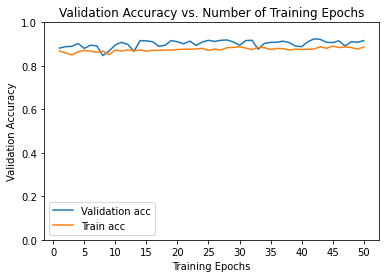

In [144]:
ohist = []
train_hist = [x for x in train_acc]

ohist = [h.cpu().numpy() for h in hist]
plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Validation acc")
plt.plot(range(1,num_epochs+1),train_hist,label="Train acc")
plt.ylim((0,1.))
plt.xticks(np.arange(0, num_epochs+1, 5))
plt.legend()
plt.show()

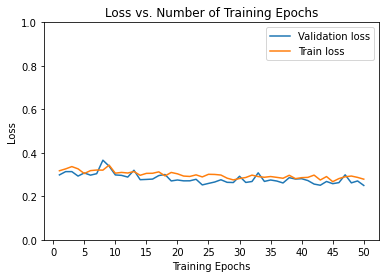

In [145]:
losshist = []
train_loss = [x for x in train_loss]
losshist =[h for h in loss]
plt.title("Loss vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.plot(range(1,num_epochs+1),losshist,label="Validation loss")
plt.plot(range(1,num_epochs+1),train_loss,label="Train loss")
plt.ylim((0,1.))
plt.xticks(np.arange(0, num_epochs+1, 5.0))
plt.legend()
plt.show()

In [149]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5,0.5,0.5])
    std = np.array([0.5,0.5,0.5])
    inp = std * inp + mean
    axis.imshow(inp)

In [150]:
from mpl_toolkits.axes_grid1 import ImageGrid
from torch.autograd import Variable
def visualize_model(dataloders, model, num_images=16):
    cnt = 0
    fig = plt.figure(1, figsize=(16, 16))
    grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
    use_gpu = torch.cuda.is_available()
    for i, (inputs, labels) in enumerate(dataloders['val']):
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            ax = grid[cnt]
            imshow(ax, inputs.cpu().data[j])
            ax.text(10, 210, '{}/{}'.format(preds[j], labels.data[j]), 
                    color='k', backgroundcolor='w', alpha=0.8)
            cnt += 1
            if cnt == num_images:
                return

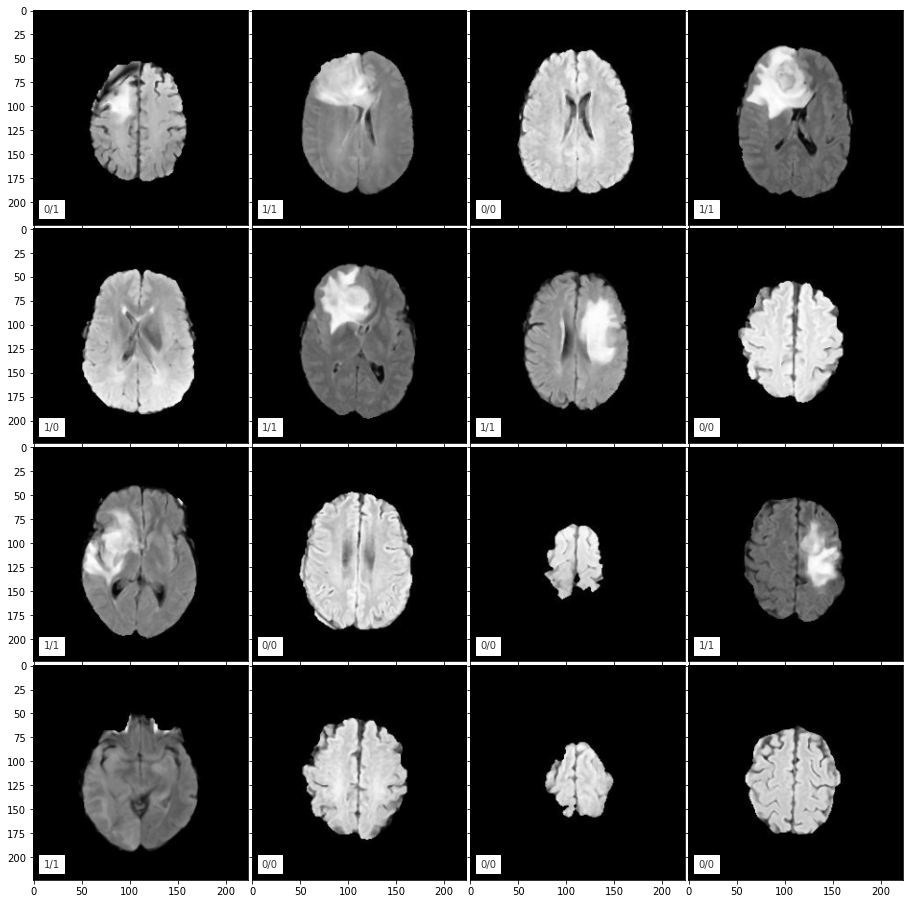

In [151]:
visualize_model(dataloaders_dict, model_ft)

In [152]:
model_ft.eval()

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

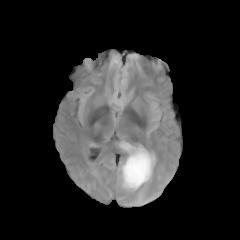

In [208]:
actual_dir = os.getcwd() 
folder_name="Brain Tumor"
data_dir = os.path.join(actual_dir, folder_name)
image_dir = os.path.join(data_dir, folder_name)
image = os.path.join(image_dir, "Image150.jpg")
img = Image.open(image)
img

In [209]:
transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
    ])

In [257]:
joblib.dump(transform,'image_transform.pkl')

['image_transform.pkl']

In [210]:
img_t = transform(img)
img_t.shape

torch.Size([3, 224, 224])

In [211]:
batch_t = torch.unsqueeze(img_t,0)

In [254]:
model = model_ft.eval()

In [255]:
joblib.dump(model, 'images_classification.pkl')

['images_classification.pkl']

In [213]:
out = model_ft(batch_t)
out.shape

torch.Size([1, 2])

In [214]:
labels = ["No tumor", "Tumor"]

In [215]:
_, index = torch.max(out, 1)
 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

if (labels[index[0]] == "Tumor"):
    pacient = "tenir un tumor cerebral"
else: 
    pacient = "no tenir un tumor cerebral"
print(f"El pacient té {round(percentage[index[0]].item(),2)}% de possiblitats de {pacient}")


El pacient té 89.08% de possiblitats de tenir un tumor cerebral


Epoch 0/4
----------
train Loss: 0.6887 Acc: 0.5478
val Loss: 0.6931 Acc: 0.5532

Epoch 1/4
----------
train Loss: 0.6867 Acc: 0.5525
val Loss: 0.6784 Acc: 0.5532

Epoch 2/4
----------
train Loss: 0.6341 Acc: 0.5525
val Loss: 0.6013 Acc: 0.5532

Epoch 3/4
----------
train Loss: 0.6153 Acc: 0.6066
val Loss: 0.6536 Acc: 0.5691

Epoch 4/4
----------
train Loss: 0.6057 Acc: 0.5551
val Loss: 0.5572 Acc: 0.5532

Training complete in 50m 28s
Best val Acc: 0.569149


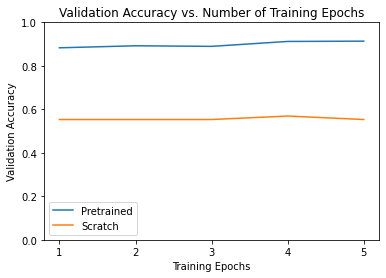

In [76]:
# Initialize the non-pretrained version of the model used for this run
scratch_model,_ = initialize_model(model_name, num_classes, feature_extract=False, use_pretrained=False)
scratch_model = scratch_model.to(device)
scratch_optimizer = optim.SGD(scratch_model.parameters(), lr=0.001, momentum=0.9)
scratch_criterion = nn.CrossEntropyLoss()
_,scratch_hist = train_model(scratch_model, dataloaders_dict, scratch_criterion, scratch_optimizer, num_epochs=num_epochs, is_inception=(model_name=="inception"))

# Plot the training curves of validation accuracy vs. number 
#  of training epochs for the transfer learning method and
#  the model trained from scratch
ohist = []
shist = []

ohist = [h.cpu().numpy() for h in hist]
shist = [h.cpu().numpy() for h in scratch_hist]

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Pretrained")
plt.plot(range(1,num_epochs+1),shist,label="Scratch")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()

In [247]:
import joblib  


In [248]:
joblib.dump(model_ft, 'squeezenet.pkl') # Guardo el modelo.
joblib.dump(sig_random, 'sigmoid.pkl') # Guardo el modelo.
joblib.dump(poly_random, 'polynomical.pkl') # Guardo el modelo.
joblib.dump(rbf_random, 'rbf.pkl') # Guardo el modelo.
joblib.dump(svcl_random, 'svcl.pkl') # Guardo el modelo.
joblib.dump(sl_random, 'sl.pkl') # Guardo el modelo.
joblib.dump(mlp_random, 'mlp.pkl') # Guardo el modelo.
joblib.dump(xb_random, 'xb.pkl') # Guardo el modelo.
joblib.dump(ada_random, 'ada.pkl') # Guardo el modelo.
joblib.dump(rf_random, 'rf.pkl') # Guardo el modelo.
joblib.dump(dt_random, 'dt.pkl') # Guardo el modelo.
joblib.dump(lr_random, 'lr.pkl') # Guardo el modelo.


['lr.pkl']

In [258]:
!pip install dill

In [260]:
import dill
dill.dump_session('notebook_env.db')